In [1]:
import pandas as pd
%matplotlib inline

# Load legislators-current.csv file from disk 
# and convert the birthday column to a date column:
legislators = pd.read_csv("../data/legislators-current.csv", encoding="latin")
legislators['birthday'] = pd.to_datetime(legislators['birthday'], format='%m/%d/%Y')
legislators = legislators[['full_name', 'birthday', 'gender', 'type', 'state']]

## Please complete the following tasks

1. In a new cell, output a data frame that only includes members of the legislature from a state of your choosing (e.g. "Only show me senators and representatives from Illinois").
2. In a new cell, output the 5 oldest senators (type == 'sen')
3. In a new cell, output the 5 youngest people in the house of representatives (type == 'rep')
4. In a new cell, output a dataframe showing the number of men and women in congress by state.
5. In a new cell, output the representative counts for each state in descending order.
6. In a new cell, make a bar chart of the states with the most representatives and the number of representatives they have.

### preview

In [2]:
legislators.head(10)

,full_name,birthday,gender,type,state
0,Sherrod Brown,1952-11-09,M,sen,OH
1,Maria Cantwell,1958-10-13,F,sen,WA
2,Benjamin L. Cardin,1943-10-05,M,sen,MD
3,Thomas R. Carper,1947-01-23,M,sen,DE
4,"Robert P. Casey, Jr.",1960-04-13,M,sen,PA
5,Dianne Feinstein,1933-06-22,F,sen,CA
6,Amy Klobuchar,1960-05-25,F,sen,MN
7,Robert Menendez,1954-01-01,M,sen,NJ
8,Bernard Sanders,1941-09-08,M,sen,VT
9,Debbie Stabenow,1950-04-29,F,sen,MI


### Exercise 1
Output a data frame that only includes members of the legislature from a state of your choosing (e.g. "Only show me senators and representatives from Illinois").

In [4]:
rule = legislators['state'] == 'IL'
legislators[rule]

,full_name,birthday,gender,type,state
17,Richard J. Durbin,1944-11-21,M,sen,IL
76,Danny K. Davis,1941-09-06,M,rep,IL
133,Adam Kinzinger,1978-02-27,M,rep,IL
144,Daniel Lipinski,1966-07-15,M,rep,IL
190,Mike Quigley,1958-10-17,M,rep,IL
200,Bobby L. Rush,1946-11-23,M,rep,IL
205,Janice D. Schakowsky,1944-05-26,F,rep,IL
219,John Shimkus,1958-02-21,M,rep,IL
262,Bill Foster,1955-10-07,M,rep,IL
282,Tammy Duckworth,1968-03-12,F,sen,IL


### Exercise 2
Output the 5 oldest senators

In [9]:
rule = legislators['type'] == 'sen'
legislators[rule].sort_values('birthday').head(5)

,full_name,birthday,gender,type,state
5,Dianne Feinstein,1933-06-22,F,sen,CA
101,Chuck Grassley,1933-09-17,M,sen,IA
217,Richard C. Shelby,1934-05-06,M,sen,AL
20,James M. Inhofe,1934-11-17,M,sen,OK
25,Pat Roberts,1936-04-20,M,sen,KS


### Exercise 3
Output the 5 youngest people in the house of representatives

In [11]:
rule = legislators['type'] == 'rep'
legislators[rule].sort_values('birthday', ascending=False).head(5)

,full_name,birthday,gender,type,state
498,Alexandria Ocasio-Cortez,1989-10-13,F,rep,NY
465,Abby Finkenauer,1988-12-27,F,rep,IA
450,Katie Hill,1987-08-25,F,rep,CA
497,Max Rose,1986-11-28,M,rep,NY
470,Lauren Underwood,1986-10-04,F,rep,IL


### Exercise 4
Number of men and women in congress by state

In [15]:
all_by_state = legislators.groupby(['state', 'gender']).size()
females_by_state = legislators[legislators['gender'] == 'F'].groupby(['state', 'gender']).size()
males_by_state = legislators[legislators['gender'] == 'M'].groupby(['state', 'gender']).size()


In [16]:
all_by_state

state  gender
AK     F          1
       M          2
AL     F          2
       M          7
AR     M          6
AS     F          1
AZ     F          4
       M          7
CA     F         20
       M         35
CO     F          1
       M          8
CT     F          2
       M          5
DC     F          1
DE     F          1
       M          2
FL     F          8
       M         21
GA     F          1
       M         15
GU     M          1
HI     F          2
       M          2
IA     F          3
       M          3
ID     M          4
IL     F          5
       M         15
IN     F          2
                 ..
NY     M         20
OH     F          3
       M         15
OK     F          1
       M          6
OR     F          1
       M          6
PA     F          4
       M         15
PR     F          1
RI     M          4
SC     M          9
SD     M          3
TN     F          1
       M         10
TX     F          6
       M         32
UT     M          6
VA    

In [17]:
males_by_state.sort_values(ascending=False).head(10)

state  gender
CA     M         35
TX     M         32
FL     M         21
NY     M         20
GA     M         15
IL     M         15
PA     M         15
OH     M         15
NJ     M         12
NC     M         11
dtype: int64

In [18]:
females_by_state.sort_values(ascending=False).head(10)

state  gender
CA     F         20
NY     F          9
FL     F          8
WA     F          7
TX     F          6
MI     F          6
MN     F          5
IL     F          5
AZ     F          4
PA     F          4
dtype: int64

### Exercise 5
Output the states with the most representatives in the house.

In [23]:
# show the number of violations by restaurant:
house_rule = legislators['type'] == 'rep'
house = legislators[house_rule]
house.groupby(["state", "type"]).size().sort_values(ascending=False).head(20)

state  type
CA     rep     53
TX     rep     36
FL     rep     27
NY     rep     27
IL     rep     18
PA     rep     17
OH     rep     16
MI     rep     14
GA     rep     14
NJ     rep     12
VA     rep     11
NC     rep     11
WA     rep     10
IN     rep      9
MA     rep      9
TN     rep      9
AZ     rep      9
MD     rep      8
MN     rep      8
WI     rep      8
dtype: int64

###  Exercise 6
Create a chart of the number of people in the house of representatives by state

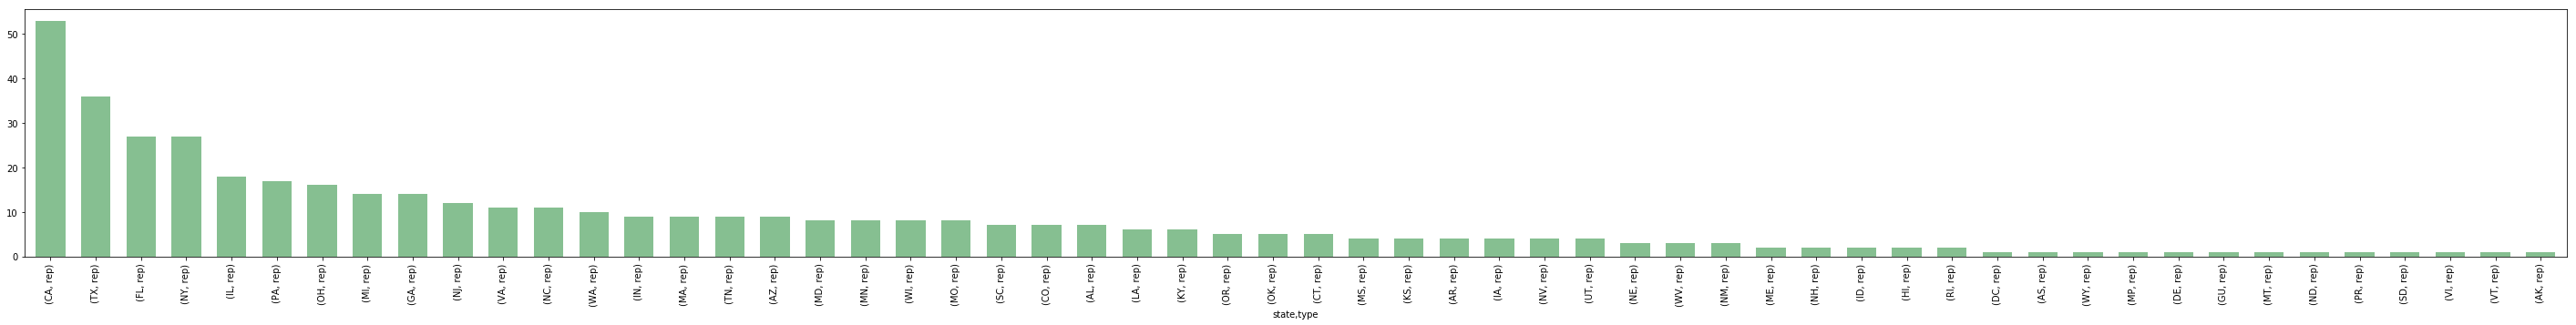

In [26]:
# define the plot parameters (color, etc.)
house_counts.plot(kind='bar', figsize=(50, 5), color='#86bf91', zorder=2, width=0.65)
